## EDA of our dataset

### Importing libraries

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [11]:
data = pd.read_csv('Devices.csv')
data.head()

,Unnamed: 0,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device
0,0,55,2.70432,8.0,0.003666,35,M,179.0,5.6,1.Sedentary,Fitbit
1,1,54,2.92968,13.0,0.006027,35,M,179.0,5.6,1.Sedentary,Fitbit
2,2,59,2.70432,9.0,0.004163,35,M,179.0,5.6,1.Sedentary,Fitbit
3,3,58,2.70432,11.0,0.005095,35,M,179.0,5.6,1.Sedentary,Fitbit
4,4,58,1.12680,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit


In [12]:
data.isnull().values.any()

False

In [13]:
data.isnull().sum()

Unnamed: 0    0
Heart         0
Calories      0
Steps         0
Distance      0
Age           0
Gender        0
Weight        0
Height        0
Activity      0
Device        0
dtype: int64

In [14]:
data = data.drop(data.columns[0], axis=1)
data.head()

,Heart,Calories,Steps,Distance,Age,Gender,Weight,Height,Activity,Device
0,55,2.70432,8.0,0.003666,35,M,179.0,5.6,1.Sedentary,Fitbit
1,54,2.92968,13.0,0.006027,35,M,179.0,5.6,1.Sedentary,Fitbit
2,59,2.70432,9.0,0.004163,35,M,179.0,5.6,1.Sedentary,Fitbit
3,58,2.70432,11.0,0.005095,35,M,179.0,5.6,1.Sedentary,Fitbit
4,58,1.12680,0.0,0.000000,35,M,179.0,5.6,1.Sedentary,Fitbit


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78586 entries, 0 to 78585
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Heart     78586 non-null  int64  
 1   Calories  78586 non-null  float64
 2   Steps     78586 non-null  float64
 3   Distance  78586 non-null  float64
 4   Age       78586 non-null  int64  
 5   Gender    78586 non-null  object 
 6   Weight    78586 non-null  float64
 7   Height    78586 non-null  float64
 8   Activity  78586 non-null  object 
 9   Device    78586 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 6.0+ MB


### Descriptive Statistics

In [16]:
data.describe()

,Heart,Calories,Steps,Distance,Age,Weight,Height
count,78586.000000,78586.000000,78586.000000,78586.000000,78586.000000,78586.000000,78586.000000
mean,71.576655,1.068995,13.296925,6.595663,30.815107,179.622068,5.605229
std,18.068103,1.866834,25.519567,15.222391,7.356387,34.910704,0.312135
min,40.000000,0.000000,0.000000,0.000000,21.000000,115.000000,5.000000
25%,60.000000,0.106338,0.000000,0.000000,23.000000,160.000000,5.300000
50%,69.000000,0.302332,2.000000,0.042191,31.000000,180.000000,5.600000
75%,79.000000,1.139392,15.000000,6.576570,36.000000,198.400000,5.900000
max,190.000000,15.887880,203.000000,258.797672,44.000000,238.000000,6.100000


The summary statistics for the dataset are as follows:

* Heart Rate: Ranges from 40 to 190 beats per minute, with an average of approximately 71.6 BPM.
* Calories Burned: Varies from 0 to 15.89 calories per time unit, with most values clustering near the lower end (mean around 1.07).
* Steps: The data on steps taken ranges from 0 to 203 per time unit. The average is about 13.3, indicating a lot of zero or low values.
* Distance Traveled: Varies from 0 to approximately 258.8 units, but again, the mean is low (around 6.6), suggesting many zero values.
* Age: Ranges from 21 to 44 years, with an average of about 30.8 years.
* Weight and Height: Shows a typical range expected in a general adult population.

### Distribution plots for Heart, Calories, Steps, and Distance

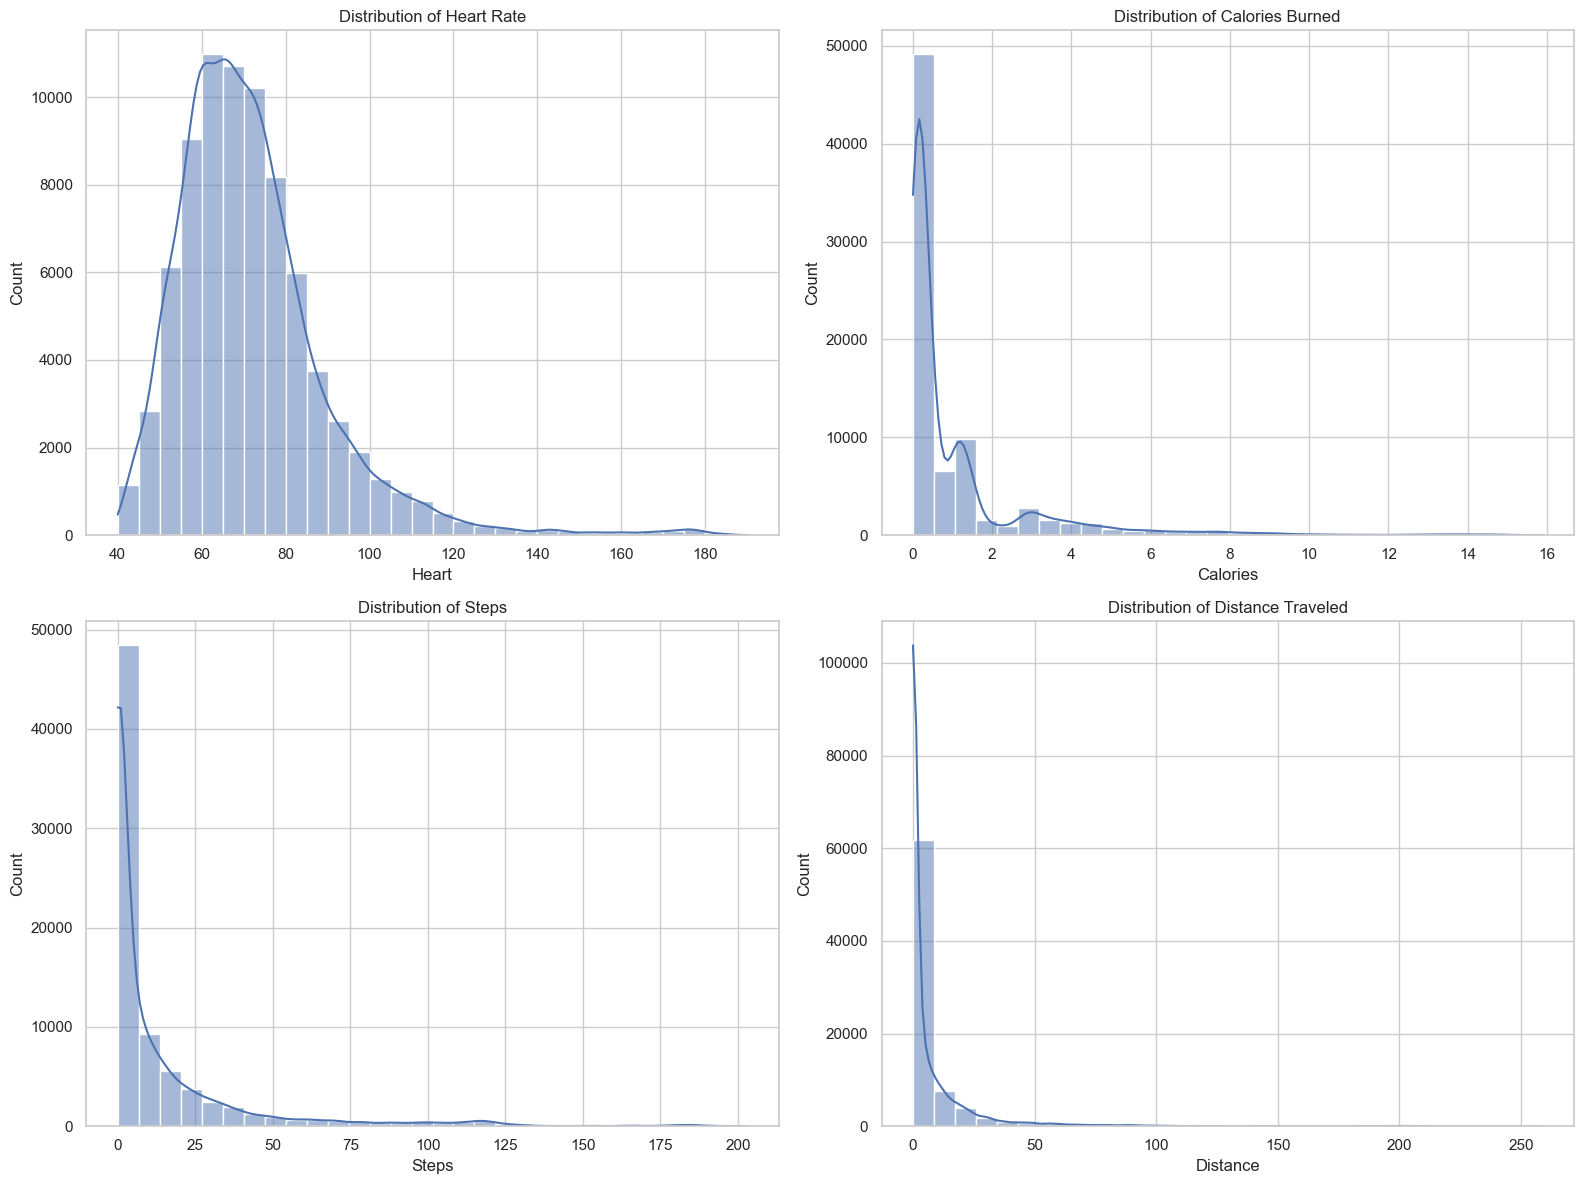

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data['Heart'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Heart Rate')

sns.histplot(data['Calories'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Calories Burned')

sns.histplot(data['Steps'], bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Steps')

sns.histplot(data['Distance'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Distance Traveled')

plt.tight_layout()
plt.show()

* Heart Rate and Calories Burned distributions show a right-skewed nature, indicating higher frequencies at lower values with tails extending to higher values.
* Steps and Distance are highly skewed to the right, with many values at or near zero, indicating periods of inactivity or low activity.

### Correlation matrix

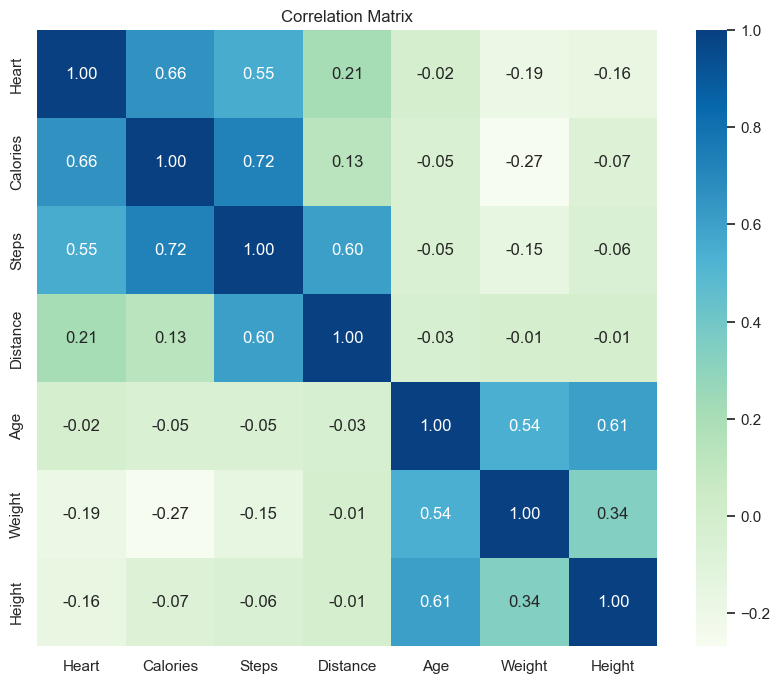

,Heart,Calories,Steps,Distance,Age,Weight,Height
Heart,1.000000,0.655747,0.554260,0.211677,-0.018228,-0.190384,-0.161510
Calories,0.655747,1.000000,0.724387,0.130740,-0.050266,-0.266810,-0.072488
Steps,0.554260,0.724387,1.000000,0.604667,-0.053155,-0.150754,-0.055899
Distance,0.211677,0.130740,0.604667,1.000000,-0.025969,-0.009997,-0.009937
Age,-0.018228,-0.050266,-0.053155,-0.025969,1.000000,0.542160,0.607340
Weight,-0.190384,-0.266810,-0.150754,-0.009997,0.542160,1.000000,0.338356
Height,-0.161510,-0.072488,-0.055899,-0.009937,0.607340,0.338356,1.000000


In [40]:
correlation_matrix = data[['Heart', 'Calories', 'Steps', 'Distance', 'Age', 'Weight', 'Height']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='GnBu', cbar=True)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

The correlation matrix highlights several interesting relationships between the variables:

* Heart Rate and Calories Burned: There is a strong positive correlation (0.66), suggesting that as heart rate increases, the calories burned also tends to increase.
* Calories Burned and Steps: Also shows a strong positive correlation (0.72), indicating that higher physical activity (more steps) typically leads to higher calorie expenditure.
* Steps and Distance: A very strong positive correlation (0.60) exists between these two, which is expected as more steps usually mean more distance traveled.
* Age and Physical Attributes: Age shows positive correlations with Weight (0.54) and Height (0.61), possibly indicating a dataset that includes a variety of age groups where body composition varies with age.

### Bar chart for distributions of Gender, Activity, and Device

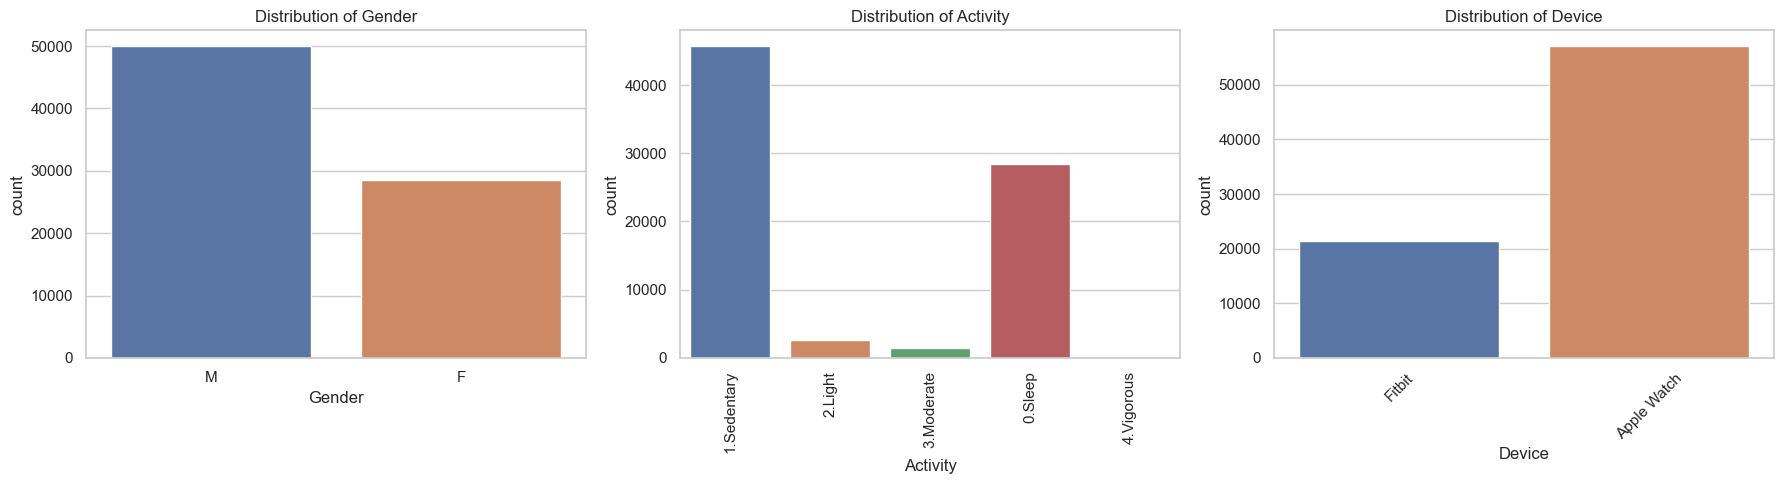

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gender distribution
sns.countplot(data=data, x='Gender', ax=ax[0])
ax[0].set_title('Distribution of Gender')

# Activity distribution
sns.countplot(data=data, x='Activity', ax=ax[1])
ax[1].set_title('Distribution of Activity')
ax[1].tick_params(axis='x', rotation=90)  # Rotate labels for better visibility

# Device distribution
sns.countplot(data=data, x='Device', ax=ax[2])
ax[2].set_title('Distribution of Device')
ax[2].tick_params(axis='x', rotation=45)  # Rotate labels for better visibility

plt.tight_layout()
plt.show()


### Pair Plot of Heart, Calories, Steps and Distance by Gender

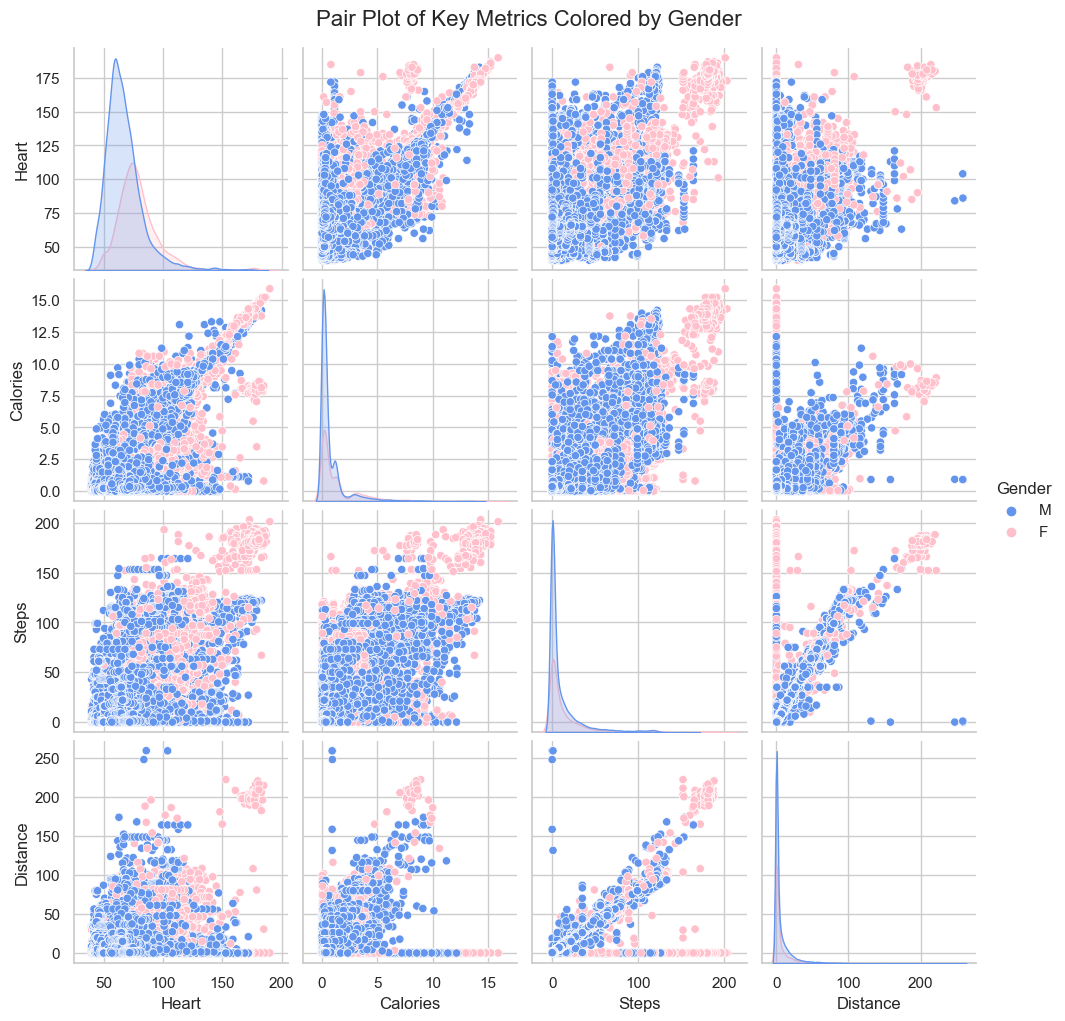

In [30]:
sns.set(style="whitegrid")
palette = {'M': '#6495ED', 'F': '#FFC0CB'}
pair_plot = sns.pairplot(data[['Heart', 'Calories', 'Steps', 'Distance', 'Gender']],
                         hue='Gender', diag_kind='kde', height=2.5, palette=palette)
pair_plot.fig.suptitle('Pair Plot of Key Metrics Colored by Gender', size=16, y=1.02)
plt.show()

### Box plots for Heart Rate, Calories, Steps, and Distance across different Activity categories

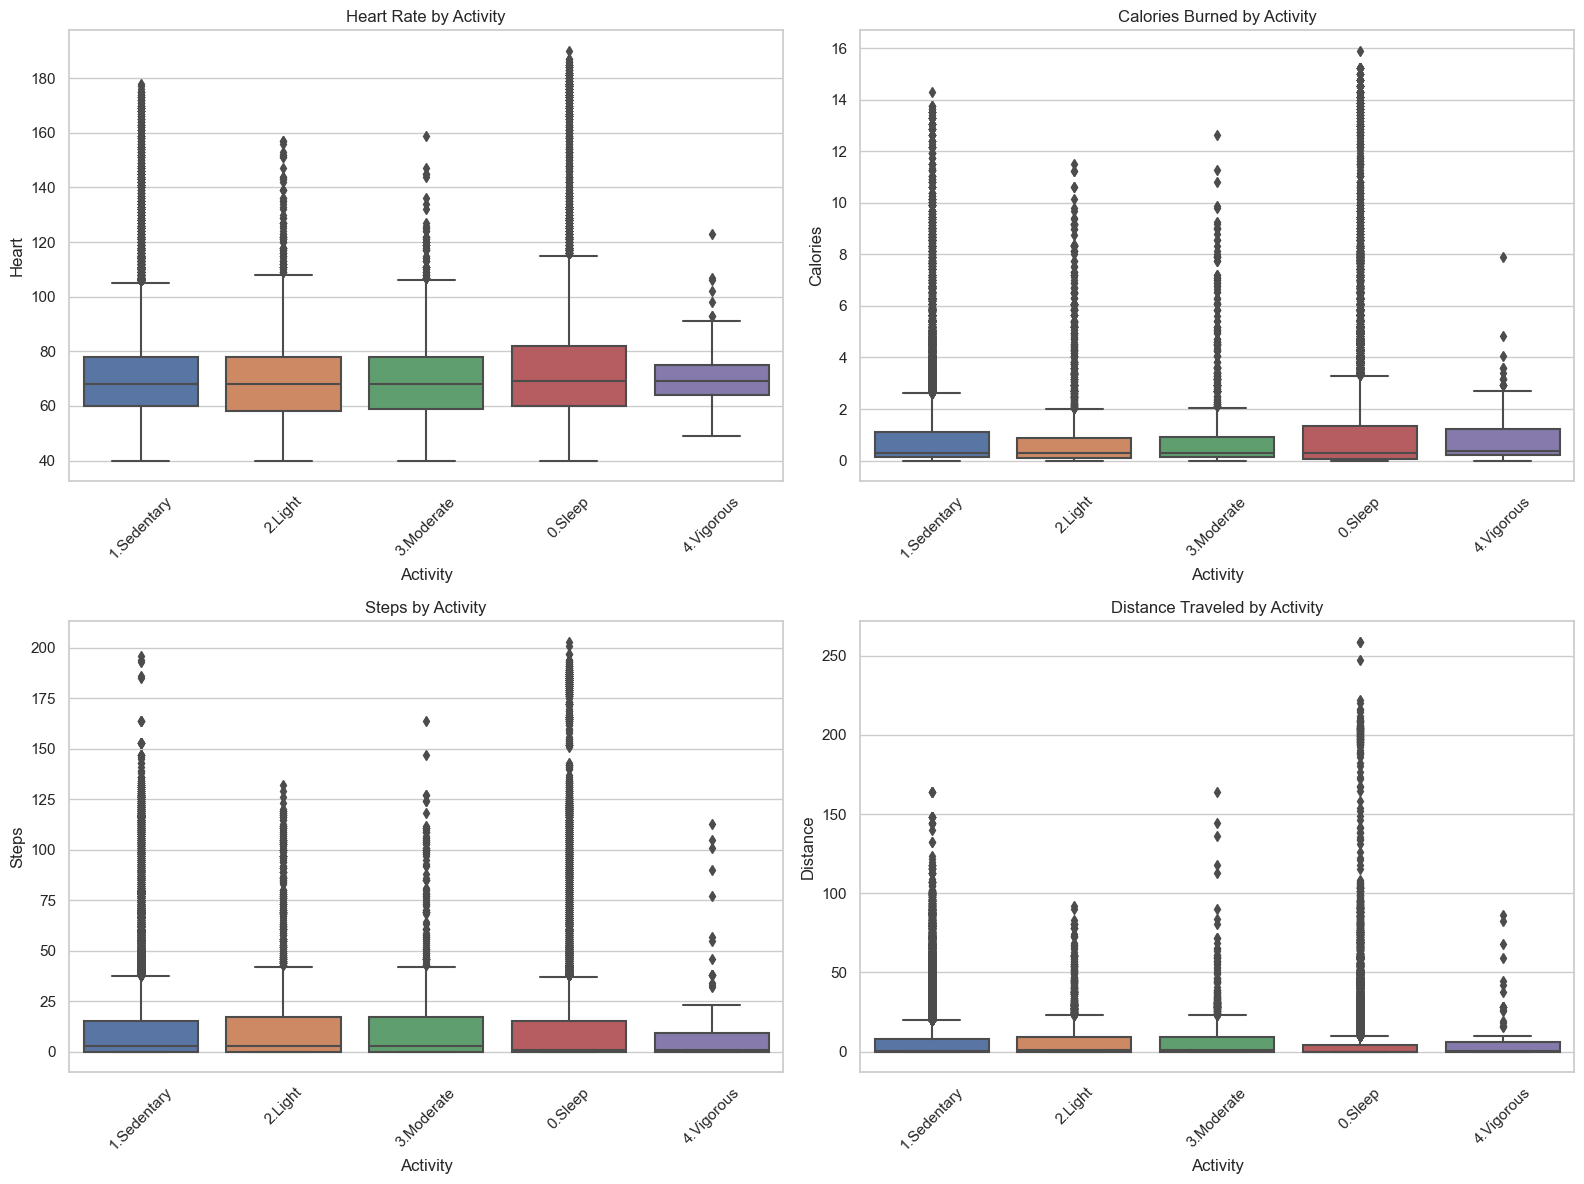

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(x='Activity', y='Heart', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Heart Rate by Activity')
ax[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Activity', y='Calories', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Calories Burned by Activity')
ax[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Activity', y='Steps', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Steps by Activity')
ax[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Activity', y='Distance', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Distance Traveled by Activity')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* Heart Rate by Activity: Shows variation in median heart rates between different activities. Activities likely associated with more exertion show higher median heart rates.
* Calories Burned by Activity: There's clear differentiation in calorie expenditure across activities. More strenuous activities typically show higher calorie burns.
* Steps by Activity: Different activities show significant variability in the number of steps, which corresponds well with the expected physical engagement.
* Distance Traveled by Activity: Similar to steps, the distance traveled varies with activity type, with more mobile activities showing greater distances.

### Violin plots for Heart Rate, Calories, Steps, and Distance across different Activity categories

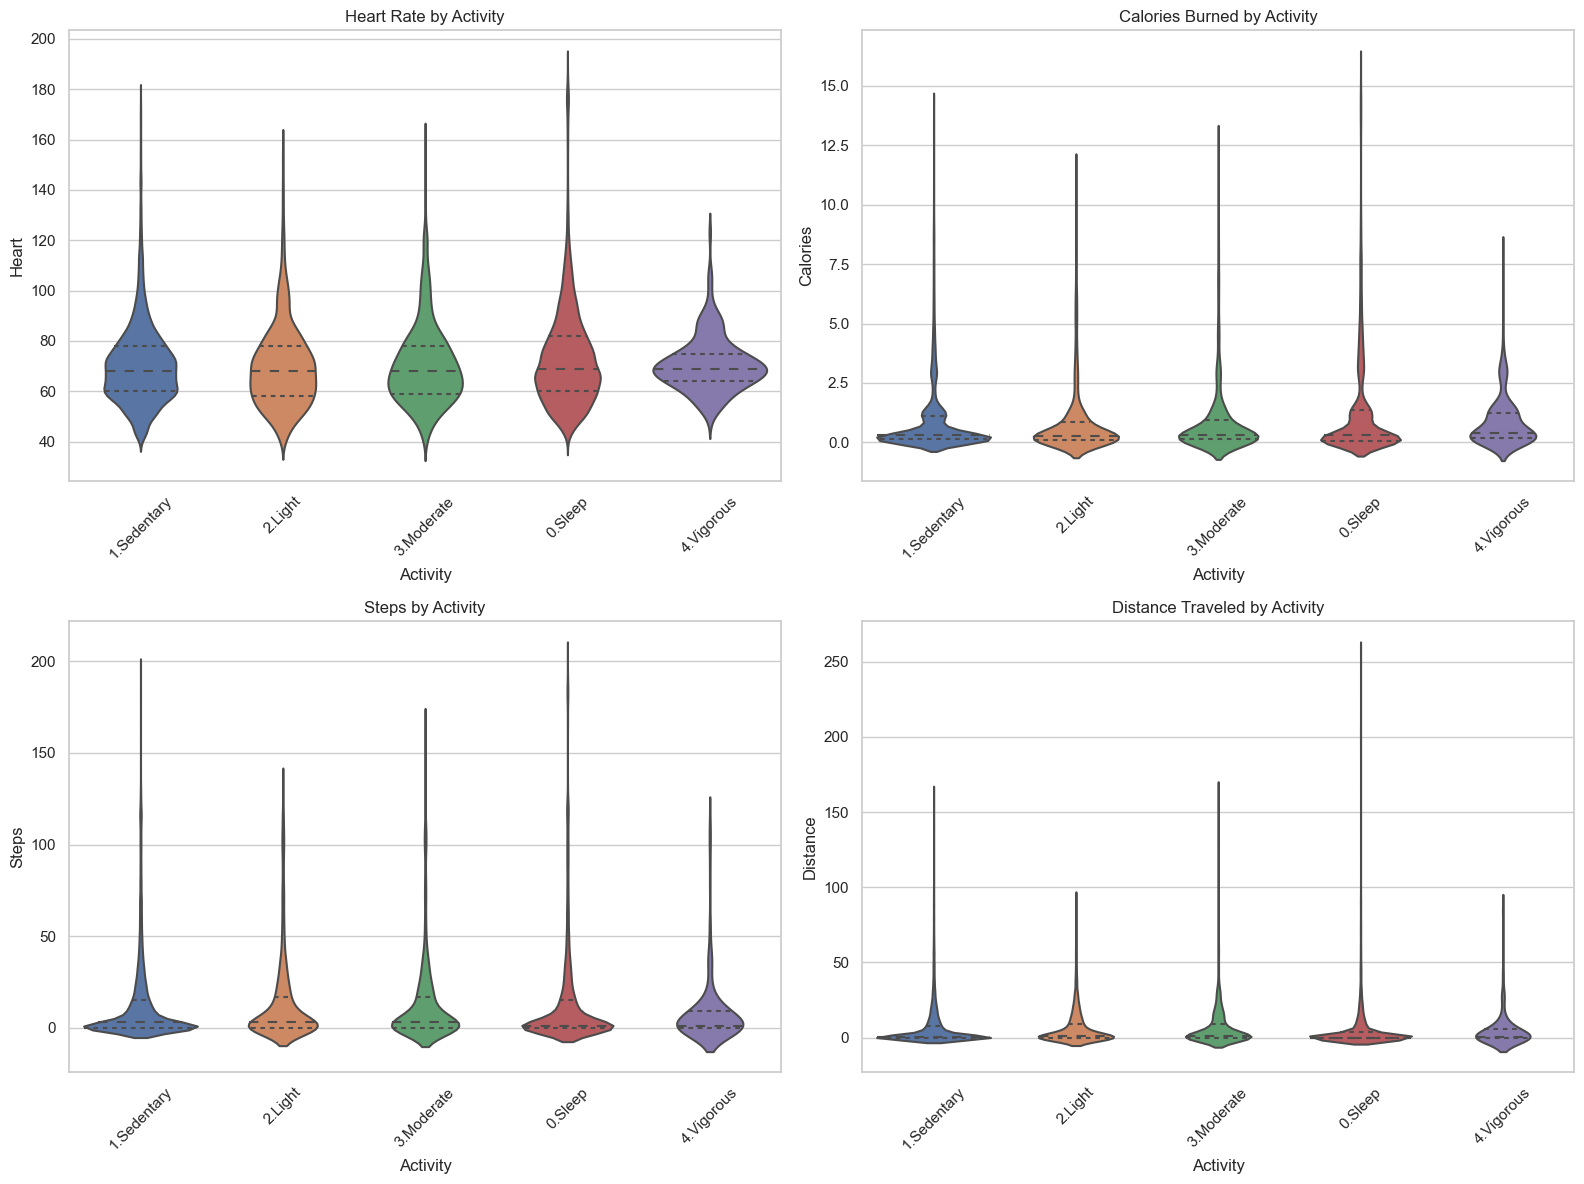

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

sns.violinplot(x='Activity', y='Heart', data=data, ax=ax[0, 0], inner='quartile')
ax[0, 0].set_title('Heart Rate by Activity')
ax[0, 0].tick_params(axis='x', rotation=45)

sns.violinplot(x='Activity', y='Calories', data=data, ax=ax[0, 1], inner='quartile')
ax[0, 1].set_title('Calories Burned by Activity')
ax[0, 1].tick_params(axis='x', rotation=45)

sns.violinplot(x='Activity', y='Steps', data=data, ax=ax[1, 0], inner='quartile')
ax[1, 0].set_title('Steps by Activity')
ax[1, 0].tick_params(axis='x', rotation=45)

sns.violinplot(x='Activity', y='Distance', data=data, ax=ax[1, 1], inner='quartile')
ax[1, 1].set_title('Distance Traveled by Activity')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Heatmap of Activity Frequency by Age and Gender

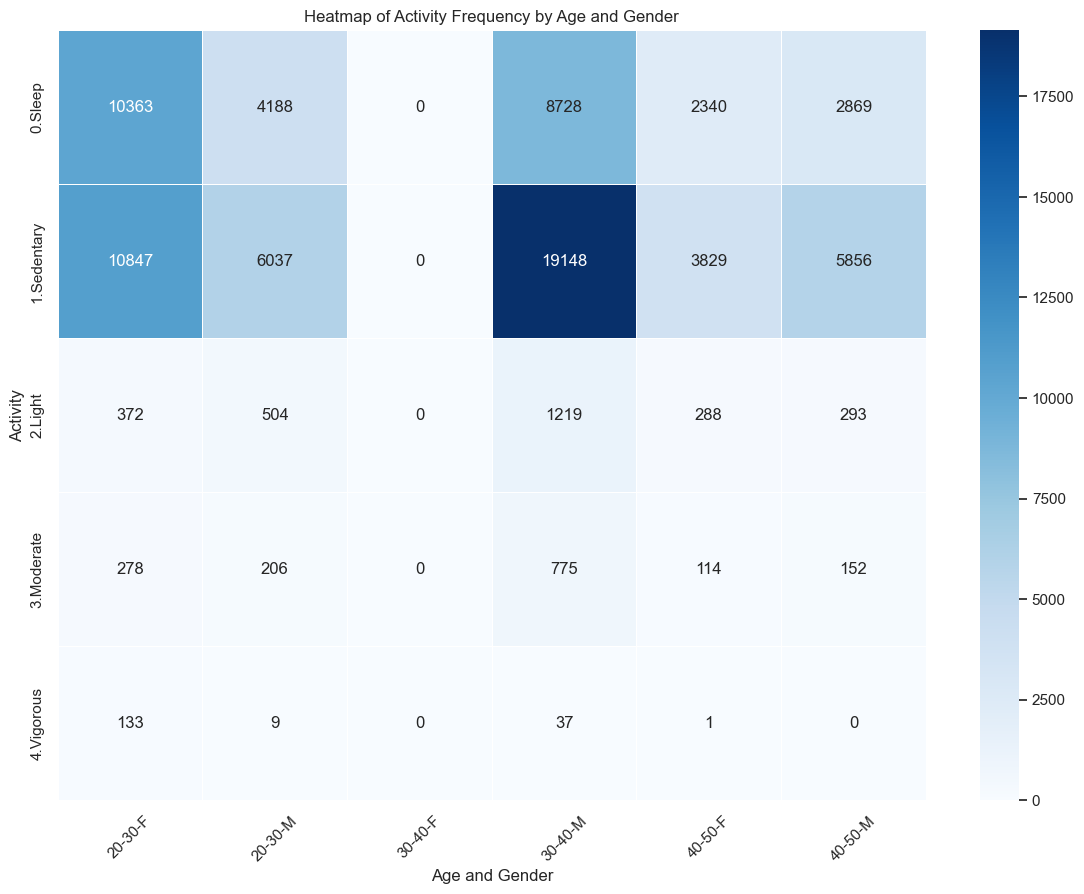

In [24]:
age_bins = pd.cut(data['Age'], bins=[20, 30, 40, 50], right=False, labels=['20-30', '30-40', '40-50'])
activity_age_gender = data.groupby([age_bins, 'Gender', 'Activity']).size().unstack(fill_value=0).stack()

# Reshape for heatmap
activity_age_gender_df = activity_age_gender.unstack(level=[0, 1]).fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(activity_age_gender_df, annot=True, fmt=".0f", cmap='Blues', linewidths=.5)
plt.title('Heatmap of Activity Frequency by Age and Gender')
plt.ylabel('Activity')
plt.xlabel('Age and Gender')
plt.xticks(rotation=45)
plt.show()

* The rows represent various activities.
* The columns are combinations of age groups (20-30, 30-40, 40-50) and genders (F for female, M for male).
* The cells are colored based on the count of occurrences, with darker shades indicating higher frequency.

### Line chart for Average Heart Rate by Age

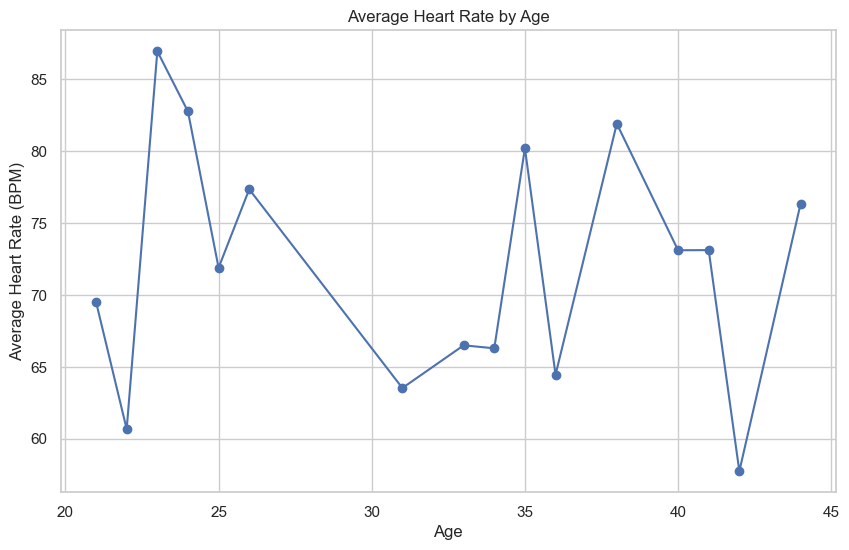

In [25]:
average_heart_rate_by_age = data.groupby('Age')['Heart'].mean()

plt.figure(figsize=(10, 6))
average_heart_rate_by_age.plot(kind='line', marker='o')
plt.title('Average Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Heart Rate (BPM)')
plt.grid(True)
plt.show()

* The x-axis represents the age of individuals.
* The y-axis shows the average heart rate in beats per minute (BPM) for each age.
* The plot shows variations in average heart rate across different ages. There might be a trend where heart rate changes with age, although the relationship doesn't appear strictly linear.
* This could reflect physiological differences, activity levels, or other health factors that vary with age.